In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('Loan_Data.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
(df.isnull().sum()/len(df)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<ipython-input-10-1ea010c7fde1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

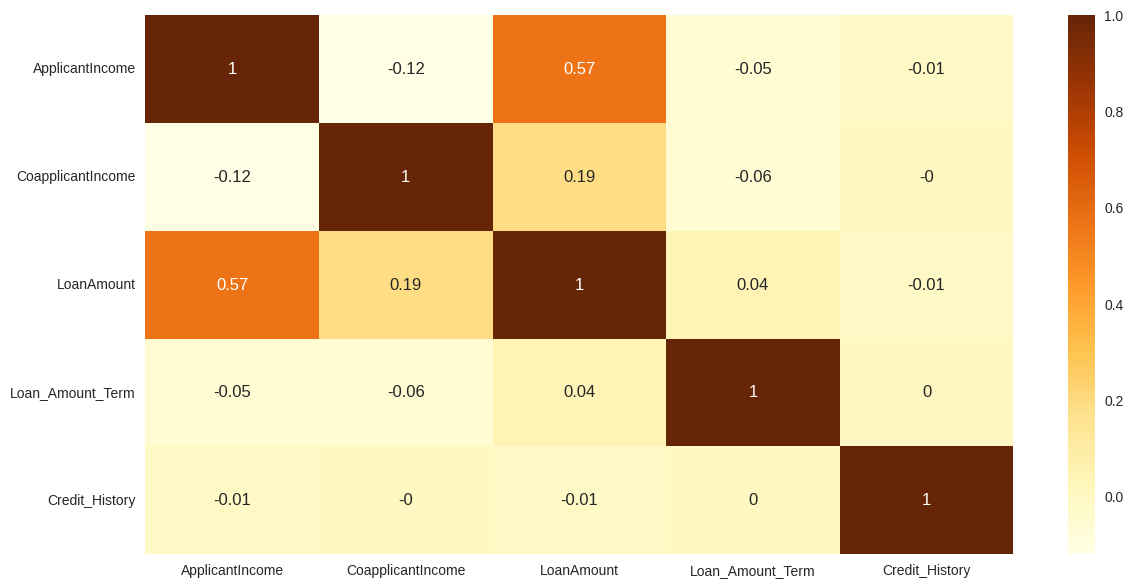

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<Axes: xlabel='Credit_History', ylabel='count'>

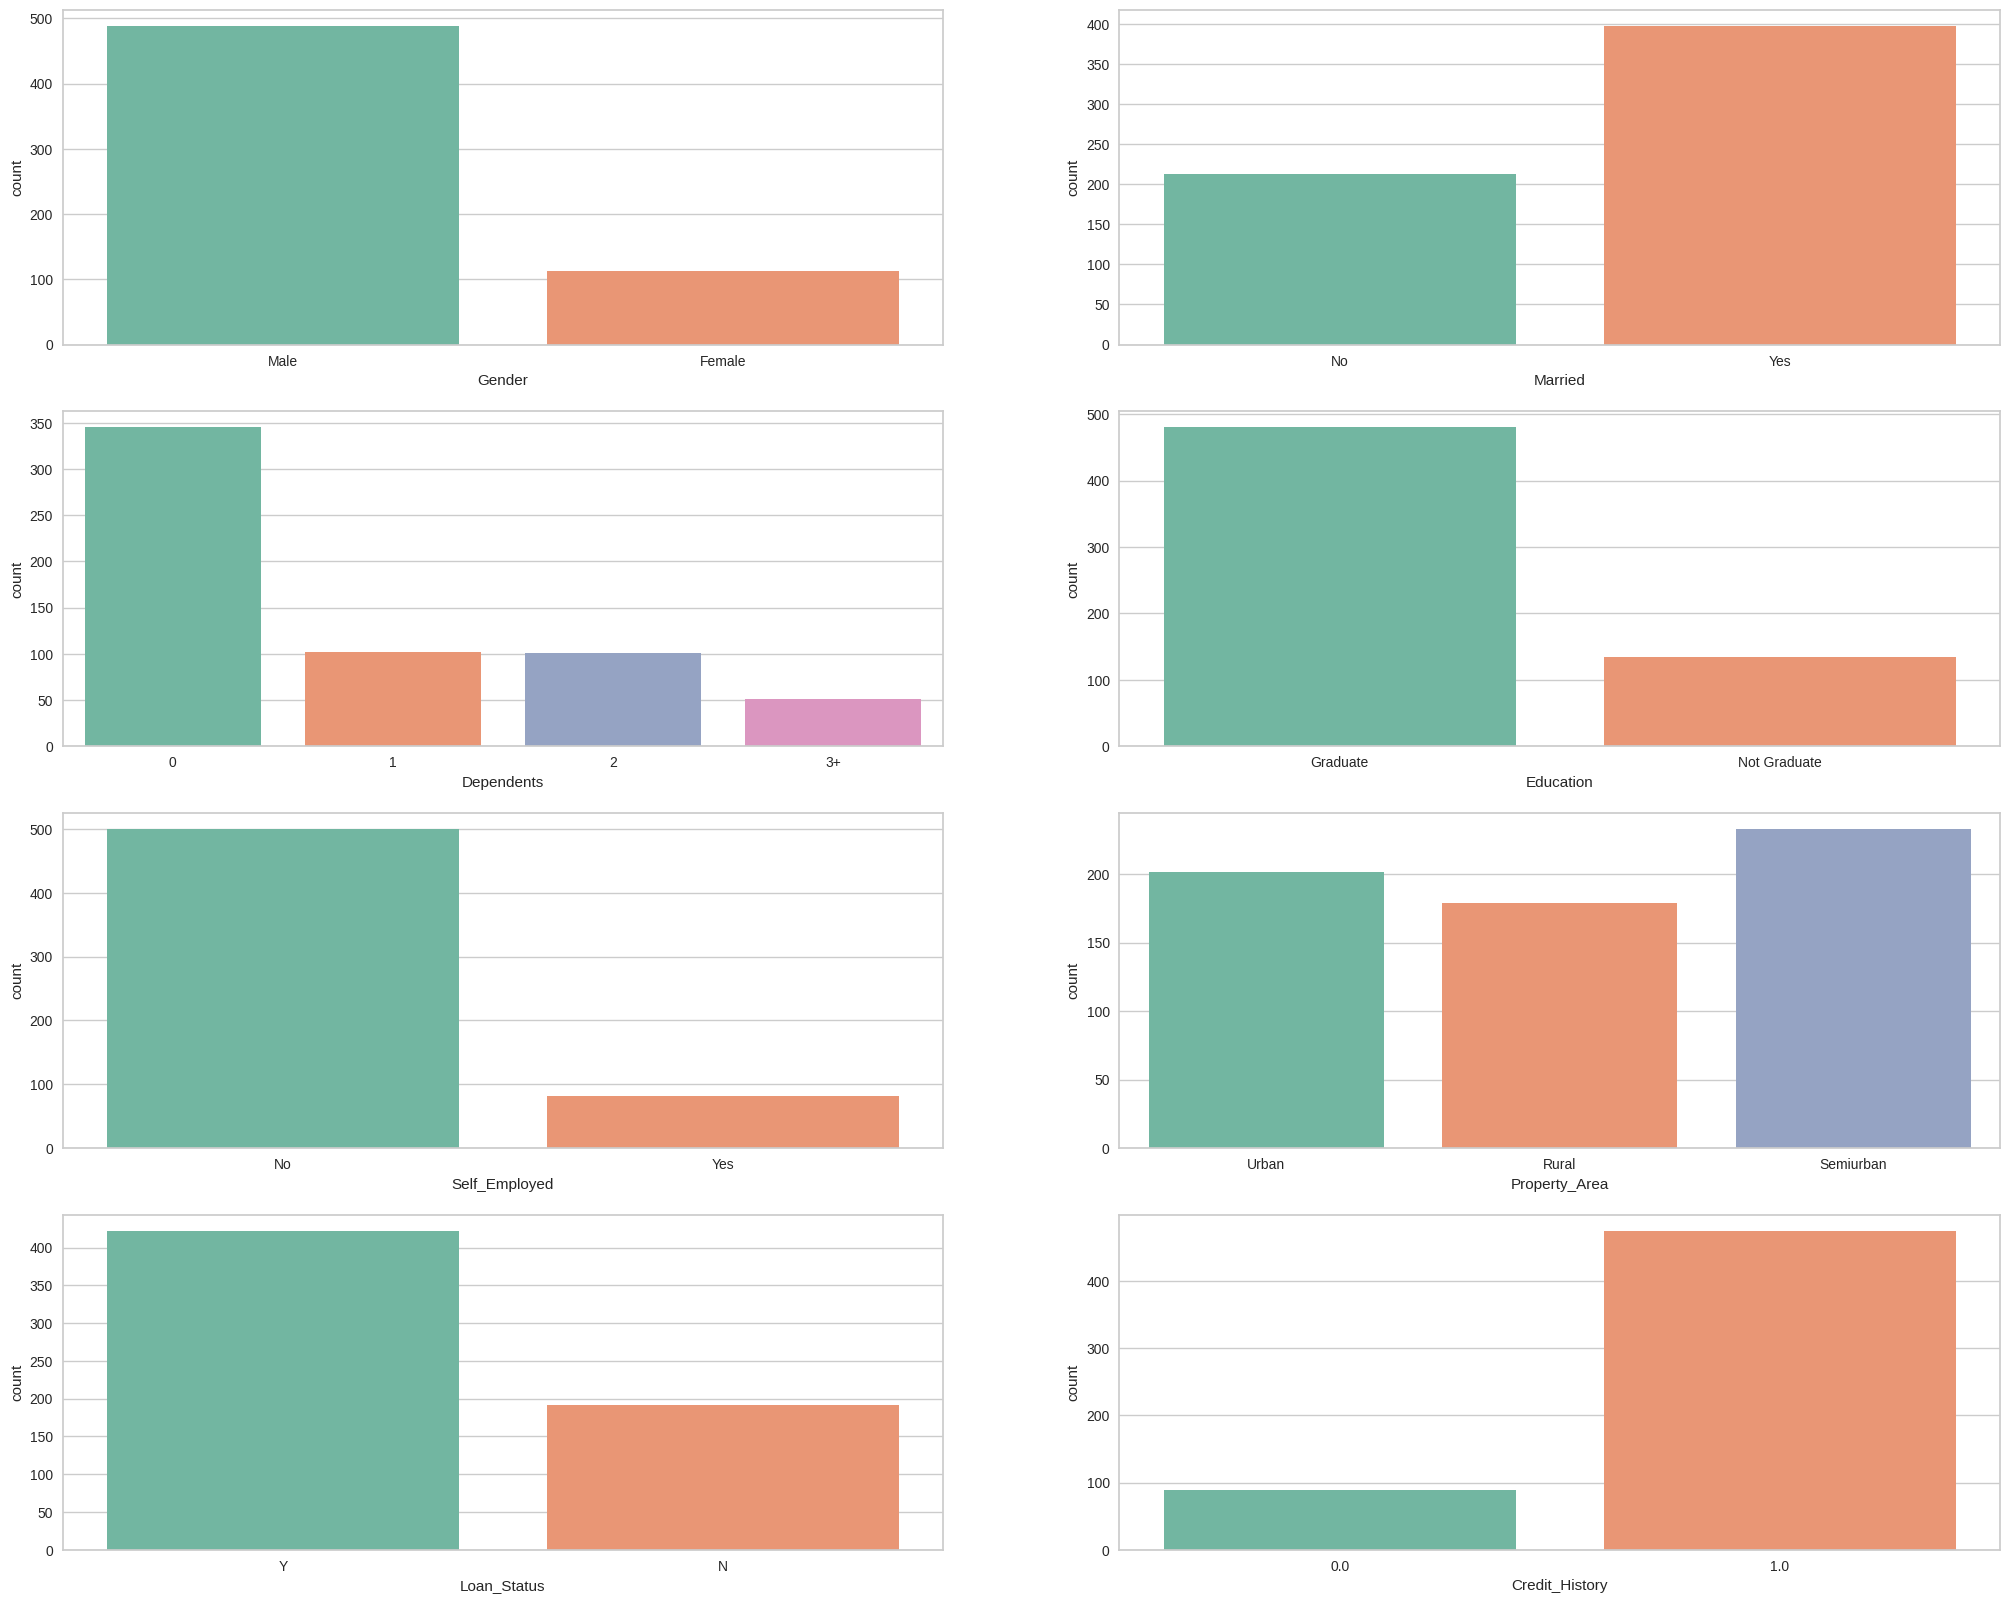

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Credit_History', palette = 'Set2', data = df)

<ipython-input-12-43f2472d884b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], kde = False)
<ipython-input-12-43f2472d884b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], kde = False)
<ipython-input-12-43f2472d884b>:11: UserWarning: 

`distplot

<Axes: xlabel='Loan_Amount_Term'>

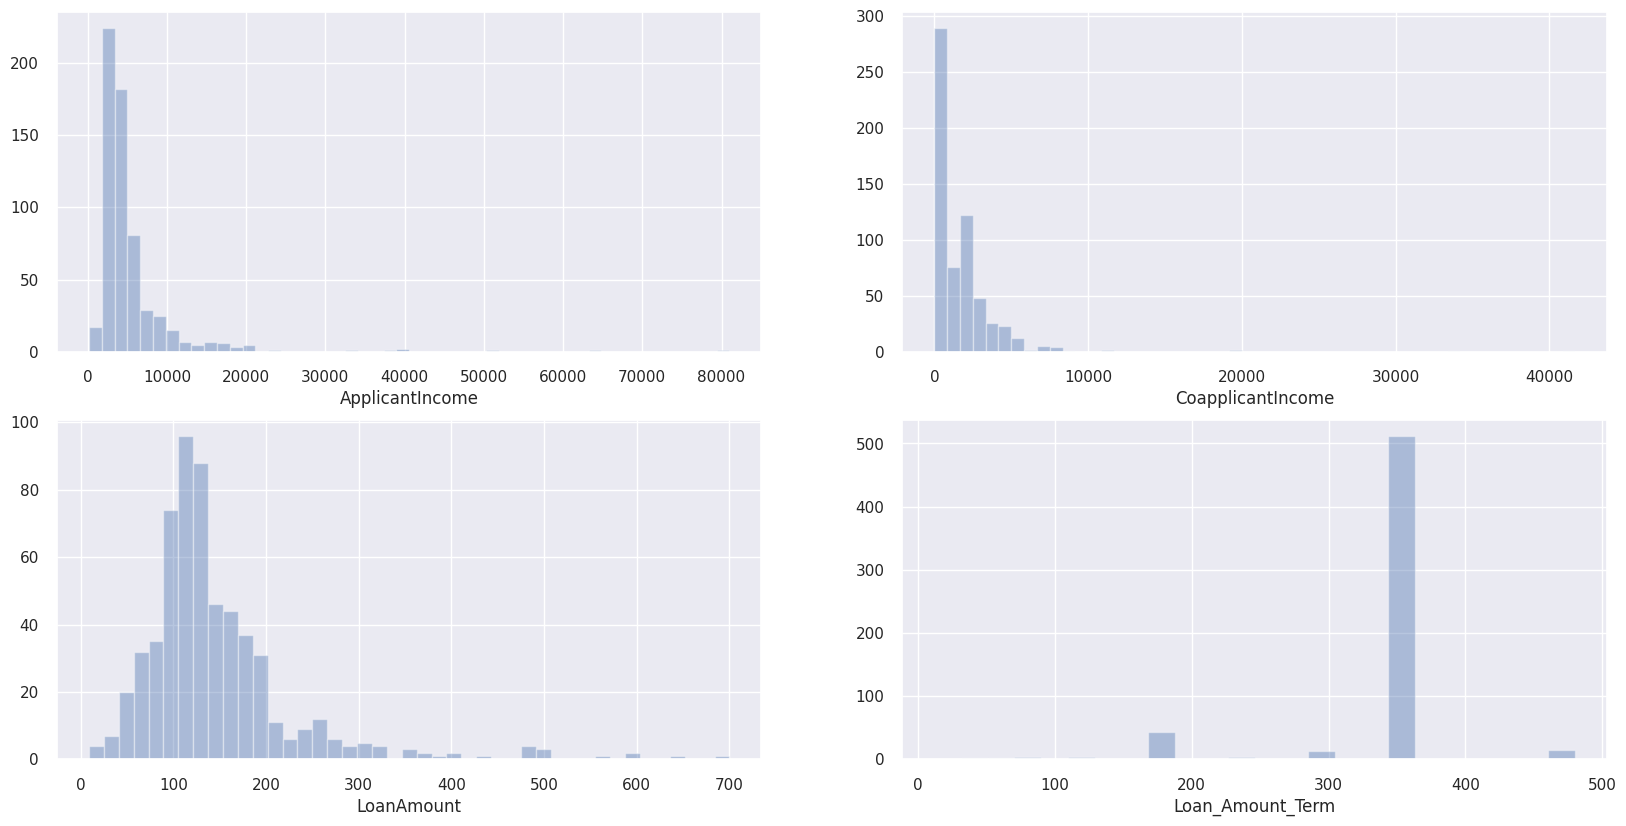

In [ ]:
plt.figure(figsize = (20,15))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df['ApplicantIncome'], kde = False)

plt.subplot(3,2,2)
sns.distplot(df['CoapplicantIncome'], kde = False)

plt.subplot(3,2,3)
sns.distplot(df['LoanAmount'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['Loan_Amount_Term'], kde = False)

<Axes: xlabel='ApplicantIncome'>

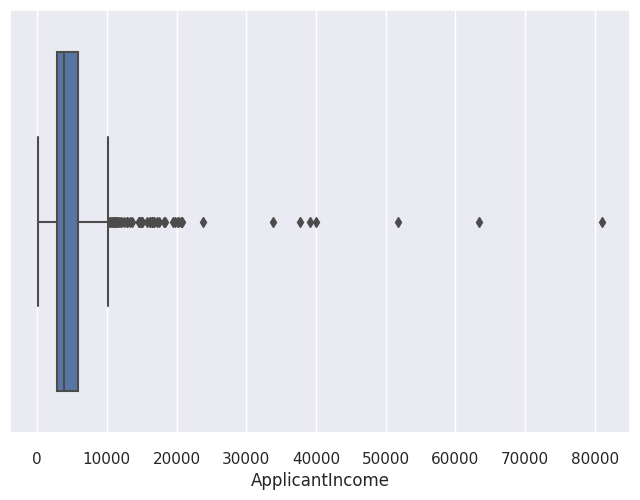

In [ ]:
sns.boxplot(x=df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome'>

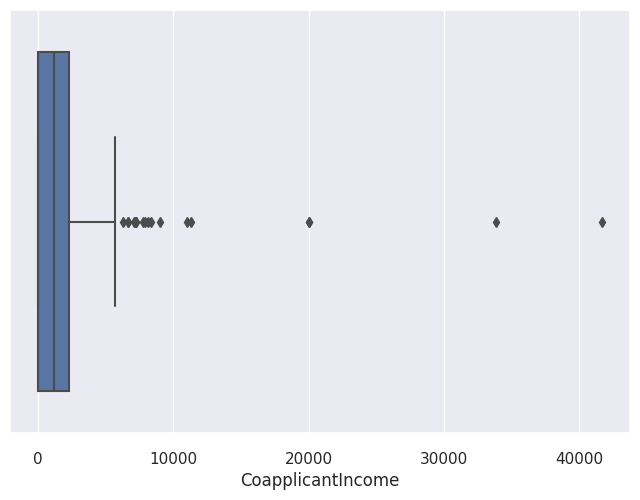

In [ ]:
sns.boxplot(x=df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount'>

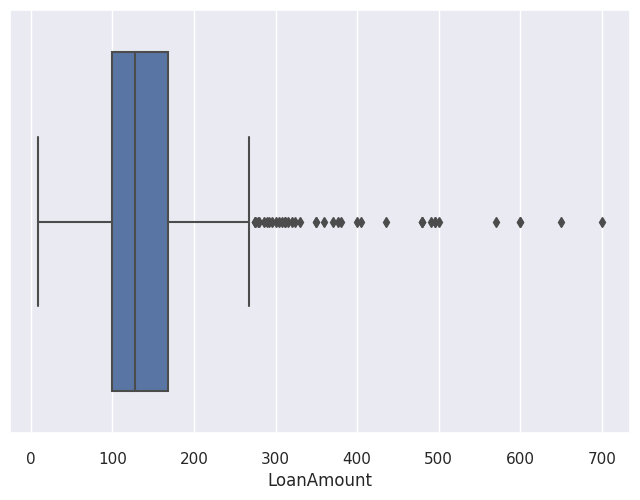

In [ ]:
sns.boxplot(x=df["LoanAmount"])

<Axes: xlabel='Credit_History', ylabel='count'>

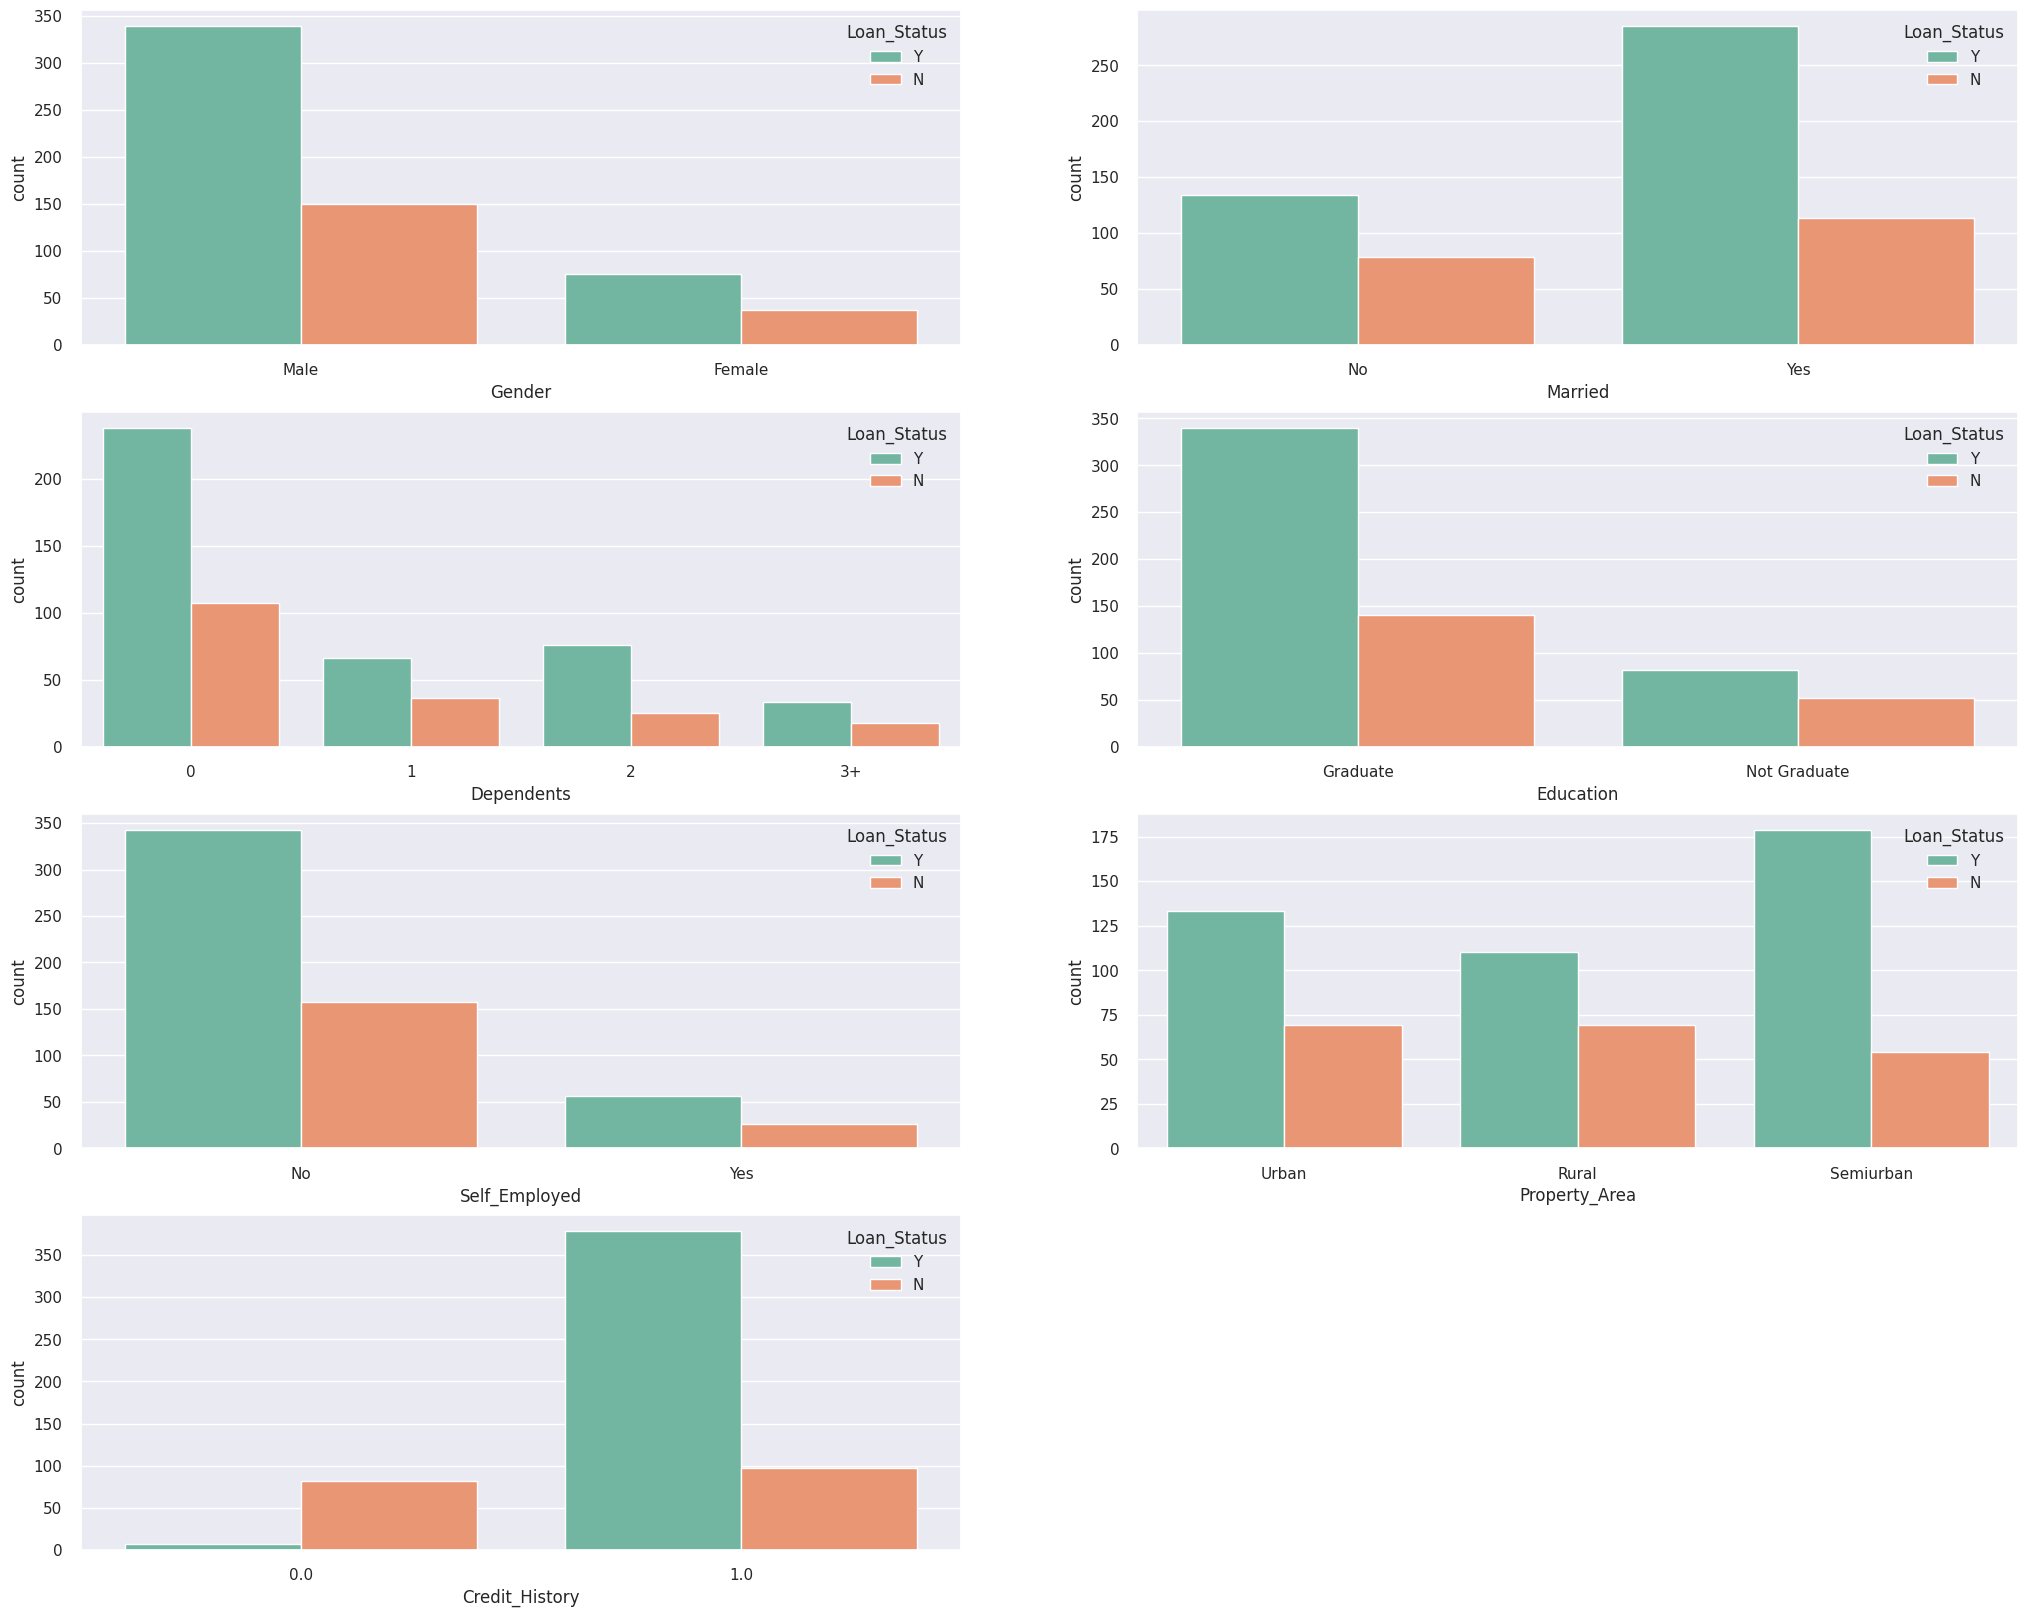

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', hue = 'Loan_Status',palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set2', data = df)

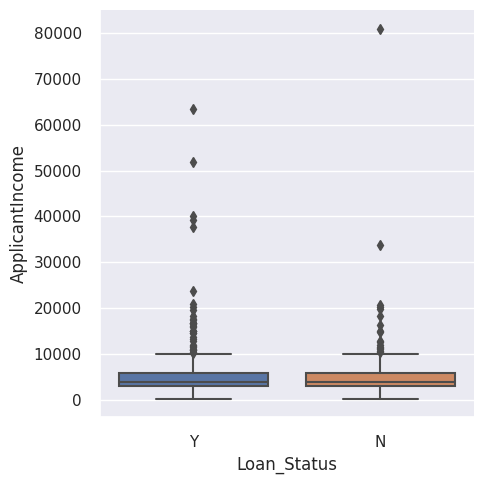

In [ ]:
sns.catplot(x = 'Loan_Status', y="ApplicantIncome", kind="box", data = df)

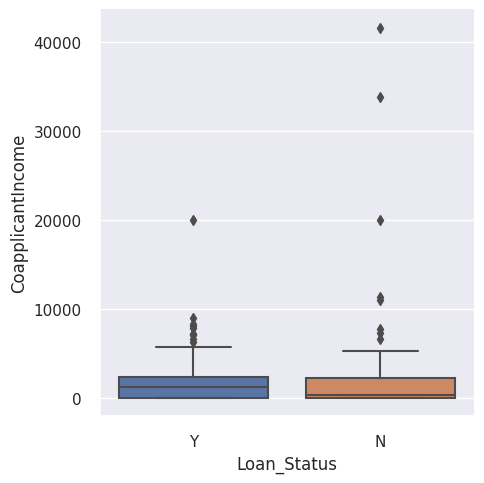

In [ ]:
sns.catplot(x = 'Loan_Status', y="CoapplicantIncome", kind="box", data = df)

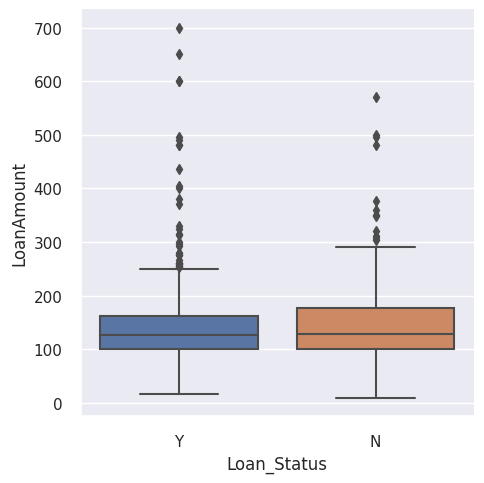

In [ ]:
sns.catplot(x = 'Loan_Status', y="LoanAmount", kind="box", data = df)

In [ ]:
(df.isnull().sum()/len(df)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
df = df[df['Credit_History'].notnull()]

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

<ipython-input-22-a442f8cca35c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
<ipython-input-22-a442f8cca35c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=df['Married'].fillna(df['Married'].mode()[0])
<ipython-input-22-a442f8cca35c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

<ipython-input-23-64259bce2631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
<ipython-input-23-64259bce2631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [ ]:
(df.isnull().sum()/len(df)) * 100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [ ]:
df = df.drop('Loan_ID', axis = 1)

In [ ]:
X = df.drop('Loan_Status', axis = 1)

In [ ]:
X = X.values

In [ ]:
y = df['Loan_Status']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)

In [ ]:
X, y = ros.fit_resample(X, y)

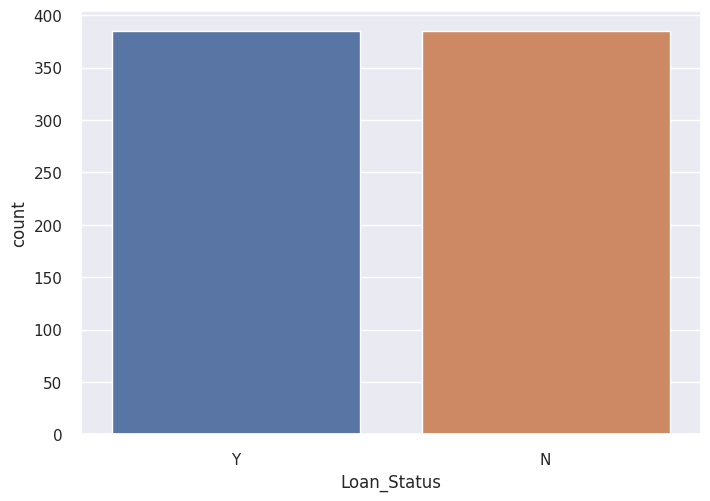

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()

In [ ]:
X[:,0] = label_encoder_Gender.fit_transform(X[:,0])
X[:,1] = label_encoder_Married.fit_transform(X[:,1])
X[:,2] = label_encoder_Dependents.fit_transform(X[:,2])
X[:,3] = label_encoder_Education.fit_transform(X[:,3])
X[:,4] = label_encoder_Self_Employed.fit_transform(X[:,4])
X[:,10] = label_encoder_Property_Area.fit_transform(X[:,10])
y = label_encoder_Loan_Status.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((539, 11), (539,))

In [ ]:
X_test.shape, y_test.shape

((231, 11), (231,))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
previsoes = naive_bayes.predict(X_test)

0.70995670995671

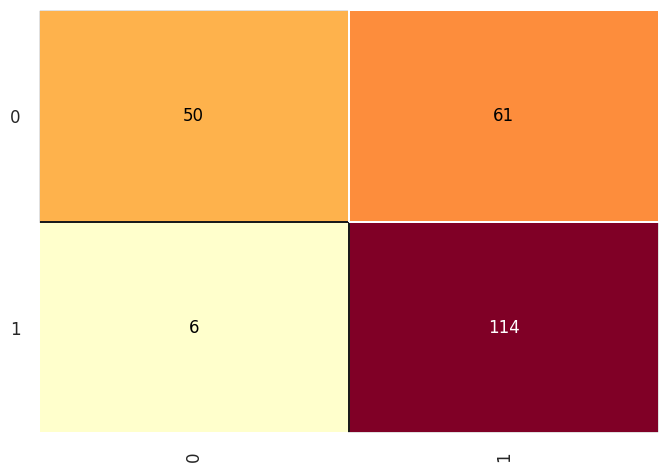

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))

In [ ]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.89      0.45      0.60       111
           1       0.65      0.95      0.77       120

    accuracy                           0.71       231
   macro avg       0.77      0.70      0.69       231
weighted avg       0.77      0.71      0.69       231



In [ ]:
score_naive_gaussian = 0.70995670995671

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [ ]:
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.784717895465559


In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4, max_depth= 11, random_state=0)

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=4, random_state=0)

In [ ]:
previsoes = decision_tree.predict(X_test)

0.7272727272727273

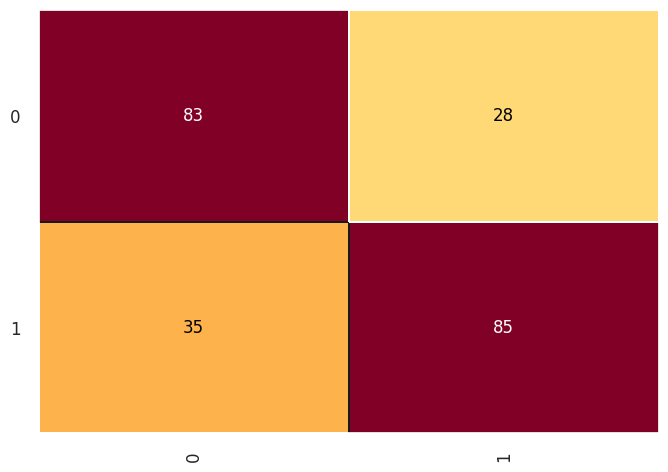

In [ ]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_decision = (classification_report(y_test, previsoes))

In [ ]:
print(classification_decision)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       111
           1       0.75      0.71      0.73       120

    accuracy                           0.73       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.73      0.73      0.73       231



In [ ]:
score_tree = 0.7272727272727273

In [ ]:
columns = df.drop('Loan_Status', axis = 1).columns

In [ ]:
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_imp

Credit_History       0.337157
LoanAmount           0.217581
ApplicantIncome      0.162869
CoapplicantIncome    0.092034
Loan_Amount_Term     0.049764
Property_Area        0.047454
Dependents           0.031819
Married              0.028511
Gender               0.014773
Education            0.014522
Self_Employed        0.003516
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [ ]:
model = RandomForestClassifier()

In [ ]:
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [ ]:
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)

Algorithm:  entropy
Score:  0.8755970924195223


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
previsoes = random_forest.predict(X_test)

0.8571428571428571

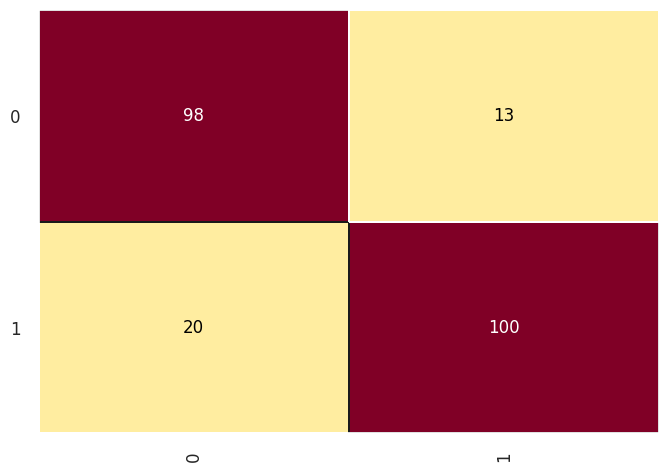

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_random = (classification_report(y_test, previsoes))

In [ ]:
print(classification_random)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       111
           1       0.88      0.83      0.86       120

    accuracy                           0.86       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.86      0.86      0.86       231



In [ ]:
score_random = 0.8528138528138528

In [ ]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_imp_random

Credit_History       0.240207
ApplicantIncome      0.214730
LoanAmount           0.182214
CoapplicantIncome    0.116487
Property_Area        0.055278
Dependents           0.047730
Loan_Amount_Term     0.047602
Married              0.028446
Education            0.025616
Gender               0.022284
Self_Employed        0.019406
dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [ ]:
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.8533056420906888


In [ ]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [ ]:
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = extra_trees.predict(X_test)

0.8484848484848485

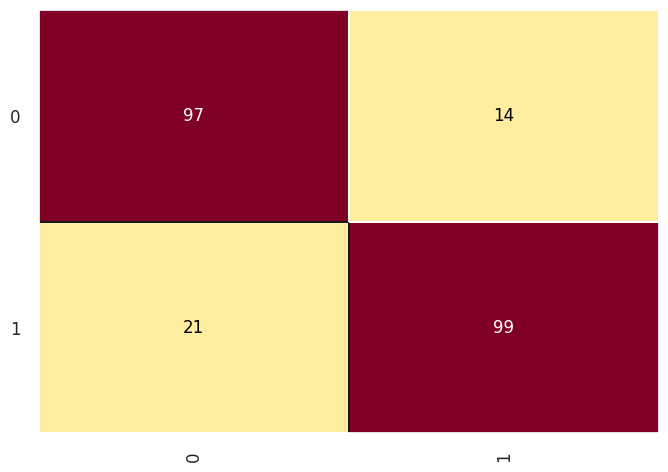

In [ ]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_extra = (classification_report(y_test, previsoes))

In [ ]:
print(classification_extra)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       111
           1       0.88      0.82      0.85       120

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231



In [ ]:
score_extra = 0.8484848484848485

In [ ]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_extra

Credit_History       0.230239
LoanAmount           0.182046
ApplicantIncome      0.173030
CoapplicantIncome    0.121668
Property_Area        0.066301
Dependents           0.065108
Loan_Amount_Term     0.052531
Self_Employed        0.027997
Education            0.027367
Gender               0.027218
Married              0.026494
dtype: float64

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters = 2, random_state=16)

In [ ]:
model.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=16)

In [ ]:
previsoes = model.predict(X_test)

In [ ]:
classification_kmeans_normal = (accuracy_score(y_test, previsoes))

In [ ]:
classification_kmeans_normal

0.5064935064935064

In [ ]:
classification_kmeans_standard = (accuracy_score(y_test, previsoes))

In [ ]:
classification_kmeans_standard

0.5064935064935064

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
k_list = list(range(1,10))

In [ ]:
k_values = dict(n_neighbors = k_list)

In [ ]:
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.7976981654551748)

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.7976981654551748)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
previsoes = knn.predict(X_test)

0.8008658008658008

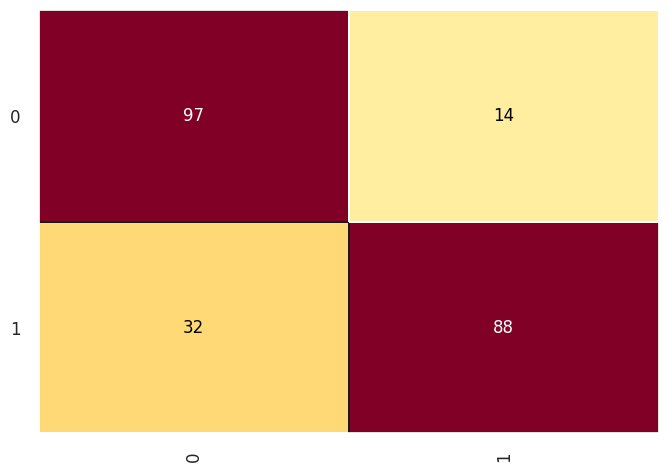

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_knn = (classification_report(y_test, previsoes))

In [ ]:
print(classification_knn)

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       111
           1       0.86      0.73      0.79       120

    accuracy                           0.80       231
   macro avg       0.81      0.80      0.80       231
weighted avg       0.81      0.80      0.80       231



In [ ]:
score_knn = 0.70995670995671

0.8008658008658008

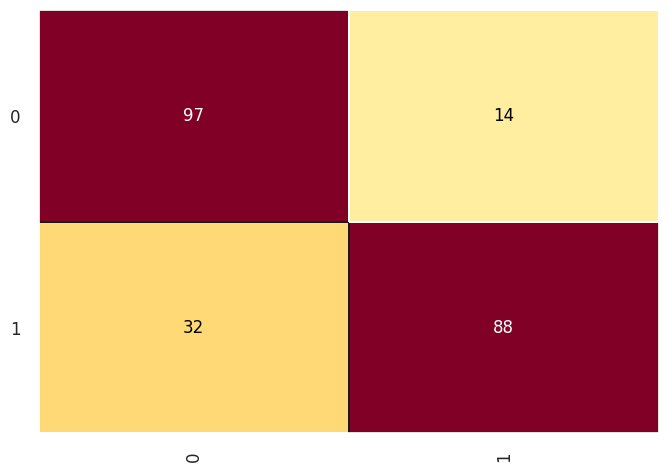

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_knn_scaler = (classification_report(y_test, previsoes))

In [ ]:
print(classification_knn_scaler)

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       111
           1       0.86      0.73      0.79       120

    accuracy                           0.80       231
   macro avg       0.81      0.80      0.80       231
weighted avg       0.81      0.80      0.80       231



In [ ]:
score_knn_scaler = 0.8008658008658008

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)

In [ ]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
previsoes = logistic.predict(X_test)

0.7142857142857143

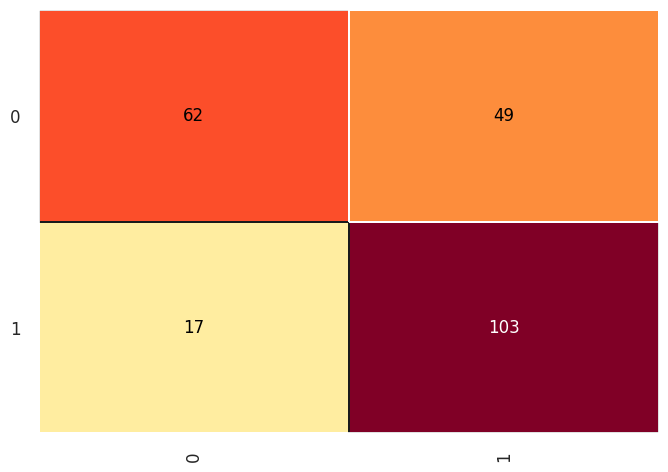

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
logistic_normal = (classification_report(y_test, previsoes))

In [ ]:
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       111
           1       0.68      0.86      0.76       120

    accuracy                           0.71       231
   macro avg       0.73      0.71      0.70       231
weighted avg       0.73      0.71      0.71       231



In [ ]:
logistic_normal = 0.7142857142857143

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = np.array([3, 4, 5])
polinomio = np.array([2, 3, 4, 5])
gamma = ['auto', 'scale']
values_grid = {'C': c, 'kernel': kernel, 'degree': polinomio, 'gamma': gamma}

In [ ]:
gridSVM = GridSearchCV(estimator = model, param_grid = values_grid, cv = 2, n_jobs = -1)

In [ ]:
gridSVM.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([3, 4, 5]), 'degree': array([2, 3, 4, 5]),
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [ ]:
print('Kernel: ', gridSVM.best_estimator_.kernel)
print('C: ', gridSVM.best_estimator_.C)
print('Polinomio', gridSVM.best_estimator_.degree)
print('Gamma', gridSVM.best_estimator_.gamma)
print('Score: ', gridSVM.best_score_)

Kernel:  poly
C:  4
Polinomio 4
Gamma auto
Score:  0.751363073110285


In [ ]:
svm = SVC(kernel = 'poly', gamma = 'auto', random_state = 1, C = 4.0)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=4.0, gamma='auto', kernel='poly', random_state=1)

In [ ]:
previsoes = svm.predict(X_test)

0.7792207792207793

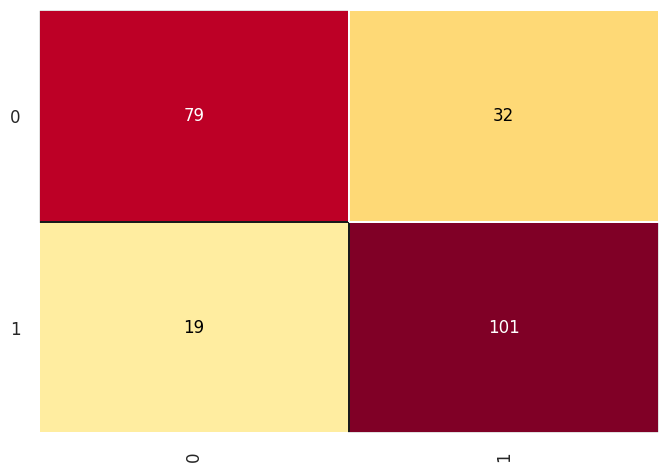

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
svm = classification_report(y_test, previsoes)

In [ ]:
print(svm)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       111
           1       0.76      0.84      0.80       120

    accuracy                           0.78       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.78      0.78      0.78       231



In [ ]:
score_svm = 0.7792207792207793

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 1.5, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [ ]:
model = AdaBoostClassifier()

In [ ]:
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 3, n_jobs = -1)

In [ ]:
gridAdaBoost.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([1. , 1.1, 1.5, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

In [ ]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.0
Score:  0.7829505483136768


In [ ]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.0, random_state = 0)

In [ ]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=0)

In [ ]:
previsoes = ada_boost.predict(X_test)

0.7965367965367965

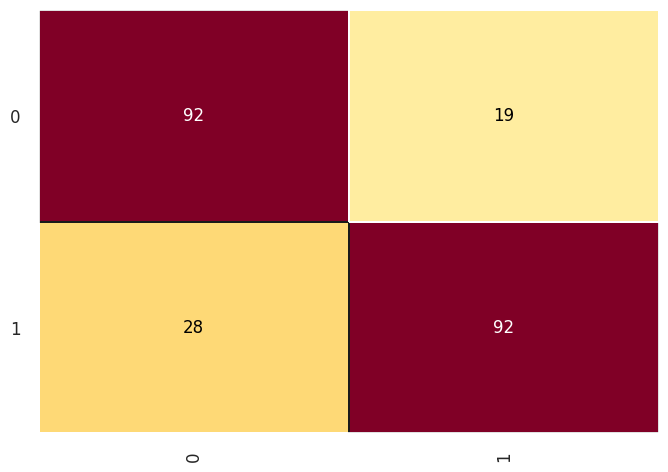

In [ ]:
cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_ada_scaler = (classification_report(y_test, previsoes))

In [ ]:
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       111
           1       0.83      0.77      0.80       120

    accuracy                           0.80       231
   macro avg       0.80      0.80      0.80       231
weighted avg       0.80      0.80      0.80       231



In [ ]:
score_ada_scaler = 0.7965367965367965

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.009, 0.008, 0.007, 0.011, 0.012, 0.013, 0.02, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 3, n_jobs = -1)

In [ ]:
gridGradient.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.009, 0.008, 0.007, 0.011, 0.012, 0.013, 0.02 , 0.005]),
                         'n_estimators': array([300])})

In [ ]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.02
Score:  0.7754914132009104


In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.02, random_state = 0)

In [ ]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=300, random_state=0)

In [ ]:
previsoes = grad_boost.predict(X_test)

0.7965367965367965

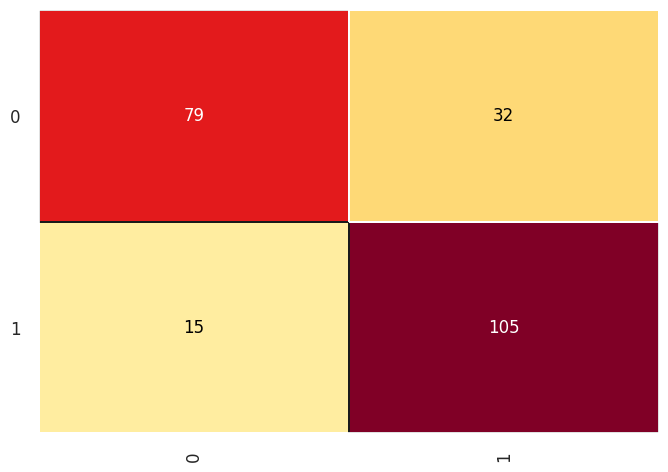

In [ ]:
cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_grad_standard = (classification_report(y_test, previsoes))

In [ ]:
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       111
           1       0.77      0.88      0.82       120

    accuracy                           0.80       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.80      0.80      0.79       231



In [ ]:
score_grad_standard = 0.7965367965367965

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

In [ ]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False)

,Chi Squared Score
CoapplicantIncome,5563.095265
ApplicantIncome,412.370785
Credit_History,46.065990
LoanAmount,45.616735
Education,9.086486
Dependents,3.207273
Married,2.236140
Property_Area,0.677337
Gender,0.313099
Self_Employed,0.238095


In [ ]:
feature_imp

Credit_History       0.337157
LoanAmount           0.217581
ApplicantIncome      0.162869
CoapplicantIncome    0.092034
Loan_Amount_Term     0.049764
Property_Area        0.047454
Dependents           0.031819
Married              0.028511
Gender               0.014773
Education            0.014522
Self_Employed        0.003516
dtype: float64

In [ ]:
feature_imp_random

Credit_History       0.240207
ApplicantIncome      0.214730
LoanAmount           0.182214
CoapplicantIncome    0.116487
Property_Area        0.055278
Dependents           0.047730
Loan_Amount_Term     0.047602
Married              0.028446
Education            0.025616
Gender               0.022284
Self_Employed        0.019406
dtype: float64

In [ ]:
feature_extra

Credit_History       0.230239
LoanAmount           0.182046
ApplicantIncome      0.173030
CoapplicantIncome    0.121668
Property_Area        0.066301
Dependents           0.065108
Loan_Amount_Term     0.052531
Self_Employed        0.027997
Education            0.027367
Gender               0.027218
Married              0.026494
dtype: float64

In [ ]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

In [ ]:
summary = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),
                      })

In [ ]:
Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':gridDecisionTree.best_estimator_.criterion,
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':gridRandomForest.best_estimator_.criterion,
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type':gridExtraTrees.best_estimator_.criterion,
               'Precision':score_extra}

In [ ]:
summary_random = pd.DataFrame({'Decision_dict':pd.Series(Decision_dict),
                        'Random_dict':pd.Series(Random_dict),
                        'Extra Tree':pd.Series(Extra_dict)
                      })

In [ ]:
K_Means_dict_v1 = {'Model':'K-Means',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':classification_kmeans_normal}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':classification_kmeans_standard}

In [ ]:
summary_k_means = pd.DataFrame({'K_Means_dict_v1':pd.Series(K_Means_dict_v1),
                       'K_Means_dict_v2':pd.Series(K_Means_dict_v2)
                      })

In [ ]:
KNN_dict_v1 = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_scaler}

In [ ]:
summary_knn = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2)
                      })

In [ ]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

In [ ]:
summary_logistic = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1)
                      })

In [ ]:
svm_dict_v1 = {'Model':'SVM',
               'Scaling':'Standard',
               'Type':gridSVM.best_estimator_.kernel,
               'Precision':score_svm}

In [ ]:
summary_svm = pd.DataFrame({'svm_dict_v1':pd.Series(svm_dict_v1)
                      })

In [ ]:
ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

In [ ]:
summary_ada = pd.DataFrame({'ada_dict_v1':pd.Series(ada_dict_v1)
                      })

In [ ]:
grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

In [ ]:
summary_grad = pd.DataFrame({'grad_dict_v1':pd.Series(grad_dict_v1)
                      })

In [ ]:
summary

,Naive_dict_v1
Model,Naive Bayes
Scaling,Normal Data
Type,Gaussian
Precision,0.709957


In [ ]:
summary_random

,Decision_dict,Random_dict,Extra Tree
Model,Decision Tree,Random Forest,Extra Trees
Scaling,Normal Data,Normal Data,Normal Data
Type,gini,entropy,gini
Precision,0.727273,0.852814,0.848485


In [ ]:
summary_k_means

,K_Means_dict_v1,K_Means_dict_v2
Model,K-Means,Means
Scaling,Normal Data,Standard
Type,-,-
Precision,0.506494,0.506494


In [ ]:
summary_knn

,KNN_dict_v1,KNN_dict_v2
Model,KNN,KNN
Scaling,Normal Data,Standard
Type,-,-
Precision,0.709957,0.800866


In [ ]:
summary_logistic

,Logistic_dict_v1
Model,Logistic Regression
Scaling,Normal Data
Type,-
Precision,0.714286


In [ ]:
summary_svm

,svm_dict_v1
Model,SVM
Scaling,Standard
Type,poly
Precision,0.779221


In [ ]:
summary_ada

,ada_dict_v1
Model,AdaBoost
Scaling,StandardScaler
Type,-
Precision,0.796537


In [ ]:
summary_grad

,grad_dict_v1
Model,GradientBoost
Scaling,StandardScaler
Type,-
Precision,0.796537
